# EDA csv

In [3]:
import pandas as pd

In [1]:
import pandas as pd
import glob

# Path ไปที่โฟลเดอร์ rml_csv
csv_files = glob.glob("/Users/gusgoodman/Documents/V89/rml_csv/*.csv")

# โหลดและรวมเป็น DataFrame เดียว
df_list = [pd.read_csv(f) for f in csv_files]
df_all = pd.concat(df_list, ignore_index=True)

print(f"Total rows: {len(df_all)}")
print(f"Total files combined: {len(csv_files)}")

Total rows: 6817
Total files combined: 6


In [2]:
# แสดงชื่อคอลัมน์ทั้งหมด
print("Columns:", df_all.columns.tolist())

# ดู 5 แถวแรก
print(df_all.head())

# ดูข้อมูลเบื้องต้น เช่น datatype, null values
print(df_all.info())


Columns: ['patient_id', 'event_id', 'family', 'type', 'start_sec', 'duration_sec', 'end_sec', 'segment_index', 'segment_local_start_sec', 'recording_start_iso']
   patient_id  event_id family         type  start_sec  duration_sec  end_sec  \
0         999         0   User         Gain        0.0           0.0      0.0   
1         999         1   User  ChannelFail        0.0           6.0      6.0   
2         999         2  Nasal        Snore        3.0           4.5      7.5   
3         999         3   User         Gain       21.0           0.0     21.0   
4         999         4   User         Gain       26.0           0.0     26.0   

   segment_index  segment_local_start_sec  recording_start_iso  
0              0                      0.0  2019-04-19T08:43:41  
1              0                      0.0  2019-04-19T08:43:41  
2              0                      3.0  2019-04-19T08:43:41  
3              0                     21.0  2019-04-19T08:43:41  
4              0           

Arousal                 1491
Bradycardia              965
ObstructiveApnea         649
LongRR                   622
PttDrop                  609
ChannelFail              442
RelativeDesaturation     435
LegMovement              420
Hypopnea                 398
Snore                    279
Gain                     209
Tachycardia              188
MixedApnea                72
CentralApnea              38
Name: type, dtype: int64
Arousal                 21.871791
Bradycardia             14.155787
ObstructiveApnea         9.520317
LongRR                   9.124248
PttDrop                  8.933548
ChannelFail              6.483791
RelativeDesaturation     6.381106
LegMovement              6.161068
Hypopnea                 5.838345
Snore                    4.092709
Gain                     3.065865
Tachycardia              2.757811
MixedApnea               1.056183
CentralApnea             0.557430
Name: type, dtype: float64


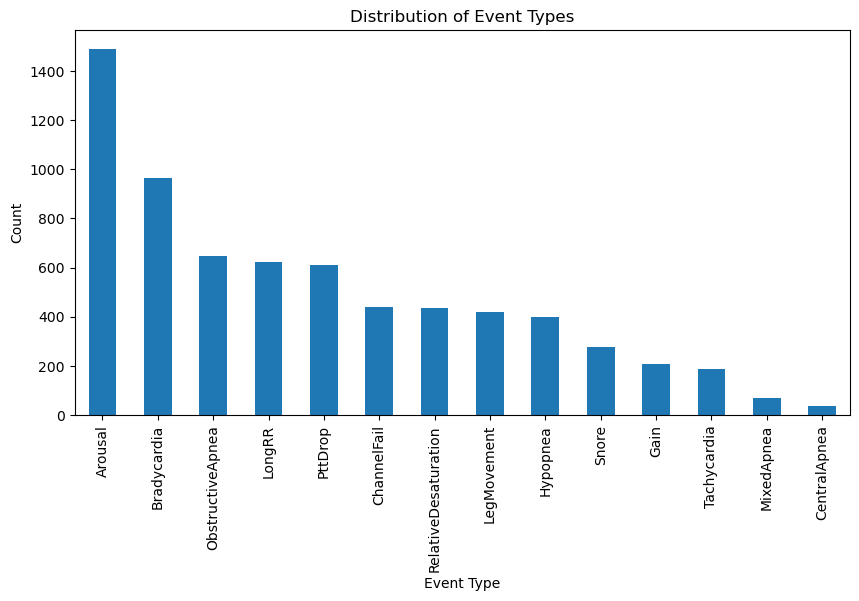

In [4]:
# นับจำนวนเหตุการณ์แต่ละประเภท
print(df_all['type'].value_counts())

# ถ้าต้องการดูในรูปเปอร์เซ็นต์
print(df_all['type'].value_counts(normalize=True) * 100)

# ถ้าต้องการดูเป็นกราฟ
import matplotlib.pyplot as plt

df_all['type'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


In [11]:
df_all['type'].value_counts()

Arousal                 1491
Bradycardia              965
ObstructiveApnea         649
LongRR                   622
PttDrop                  609
ChannelFail              442
RelativeDesaturation     435
LegMovement              420
Hypopnea                 398
Snore                    279
Gain                     209
Tachycardia              188
MixedApnea                72
CentralApnea              38
Name: type, dtype: int64

In [14]:
df_all

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,999,0,User,Gain,0.0,0.0,0.0,0,0.0,2019-04-19T08:43:41
1,999,1,User,ChannelFail,0.0,6.0,6.0,0,0.0,2019-04-19T08:43:41
2,999,2,Nasal,Snore,3.0,4.5,7.5,0,3.0,2019-04-19T08:43:41
3,999,3,User,Gain,21.0,0.0,21.0,0,21.0,2019-04-19T08:43:41
4,999,4,User,Gain,26.0,0.0,26.0,0,26.0,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
6812,995,1095,Respiratory,Hypopnea,17820.5,11.5,17832.0,4,3420.5,2019-04-17T22:35:00
6813,995,1096,Cardiac,PttDrop,17837.0,13.0,17850.0,4,3437.0,2019-04-17T22:35:00
6814,995,1097,User,Gain,17839.0,0.0,17839.0,4,3439.0,2019-04-17T22:35:00
6815,995,1098,Neuro,Arousal,17842.5,4.5,17847.0,4,3442.5,2019-04-17T22:35:00


# Create new CSV that has only respiratory class

In [15]:
import pandas as pd
import os

input_folder = "/Users/gusgoodman/Documents/V89/rml_csv"
output_folder = "/Users/gusgoodman/Documents/V89/rml_csv_respiratory"
os.makedirs(output_folder, exist_ok=True)

# Respiratory target classes
resp_classes = ["ObstructiveApnea", "CentralApnea", "MixedApnea", "Hypopnea"]

for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_folder, file))
        
        # Keep only respiratory events
        df_filtered = df[df['type'].isin(resp_classes)]
        
        if not df_filtered.empty:
            df_filtered.to_csv(os.path.join(output_folder, file), index=False)

print("Filtering complete. Saved to:", output_folder)


Filtering complete. Saved to: /Users/gusgoodman/Documents/V89/rml_csv_respiratory


In [16]:
import pandas as pd
import os

# Folder containing per-patient CSVs
input_folder = "/Users/gusgoodman/Documents/V89/rml_csv"

# Output file
output_file = "/Users/gusgoodman/Documents/V89/respiratory_events_all.csv"

# Target respiratory event types
resp_classes = ["ObstructiveApnea", "CentralApnea", "MixedApnea", "Hypopnea"]

# List to store filtered data from each patient
all_data = []

# Iterate over each CSV in the folder
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        df = pd.read_csv(file_path)

        # Keep only respiratory events
        df_filtered = df[df['type'].isin(resp_classes)].copy()

        # Add patient ID
        df_filtered['patient_id'] = file.replace(".csv", "")

        all_data.append(df_filtered)

# Combine all filtered data
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"Saved combined respiratory events to: {output_file}")
    print(f"Total events: {len(combined_df)}")
    print(combined_df['type'].value_counts())
else:
    print("No respiratory events found in any patient CSV.")


Saved combined respiratory events to: /Users/gusgoodman/Documents/V89/respiratory_events_all.csv
Total events: 1157
ObstructiveApnea    649
Hypopnea            398
MixedApnea           72
CentralApnea         38
Name: type, dtype: int64


In [17]:
combined_df

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,00000999,20,Respiratory,ObstructiveApnea,155.0,17.0,172.0,0,155.0,2019-04-19T08:43:41
1,00000999,33,Respiratory,ObstructiveApnea,209.0,19.0,228.0,0,209.0,2019-04-19T08:43:41
2,00000999,39,Respiratory,ObstructiveApnea,264.5,14.0,278.5,0,264.5,2019-04-19T08:43:41
3,00000999,44,Respiratory,ObstructiveApnea,295.5,12.5,308.0,0,295.5,2019-04-19T08:43:41
4,00000999,49,Respiratory,ObstructiveApnea,347.0,11.5,358.5,0,347.0,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
1152,00000995,1074,Respiratory,ObstructiveApnea,17610.0,10.0,17620.0,4,3210.0,2019-04-17T22:35:00
1153,00000995,1078,Respiratory,ObstructiveApnea,17642.5,16.0,17658.5,4,3242.5,2019-04-17T22:35:00
1154,00000995,1082,Respiratory,ObstructiveApnea,17682.0,18.5,17700.5,4,3282.0,2019-04-17T22:35:00
1155,00000995,1095,Respiratory,Hypopnea,17820.5,11.5,17832.0,4,3420.5,2019-04-17T22:35:00


# Load DataSet

In [26]:
df = pd.read_csv("/Users/gusgoodman/Documents/V89/snore-apnea-analyze/EDF_RML/data_csv/respiratory_plus_normal.csv")
df

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,999,20,Respiratory,ObstructiveApnea,155.000,17.0,172.000,0,155.000,2019-04-19T08:43:41
1,999,33,Respiratory,ObstructiveApnea,209.000,19.0,228.000,0,209.000,2019-04-19T08:43:41
2,999,39,Respiratory,ObstructiveApnea,264.500,14.0,278.500,0,264.500,2019-04-19T08:43:41
3,999,44,Respiratory,ObstructiveApnea,295.500,12.5,308.000,0,295.500,2019-04-19T08:43:41
4,999,49,Respiratory,ObstructiveApnea,347.000,11.5,358.500,0,347.000,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
2064,999,-1,Normal,Normal,9385.342,16.5,9401.842,2,2185.342,2019-04-19T08:43:41
2065,999,-1,Normal,Normal,3995.079,15.0,4010.079,1,395.079,2019-04-19T08:43:41
2066,999,-1,Normal,Normal,14836.353,12.5,14848.853,4,436.353,2019-04-19T08:43:41
2067,999,-1,Normal,Normal,1199.751,12.5,1212.251,0,1199.751,2019-04-19T08:43:41


In [27]:
print(df['type'].value_counts())

Normal              912
ObstructiveApnea    649
Hypopnea            398
MixedApnea           72
CentralApnea         38
Name: type, dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'CentralApnea': 0, 'Hypopnea': 1, 'MixedApnea': 2, 'Normal': 3, 'ObstructiveApnea': 4}


In [29]:
df

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso,label
0,999,20,Respiratory,ObstructiveApnea,155.000,17.0,172.000,0,155.000,2019-04-19T08:43:41,4
1,999,33,Respiratory,ObstructiveApnea,209.000,19.0,228.000,0,209.000,2019-04-19T08:43:41,4
2,999,39,Respiratory,ObstructiveApnea,264.500,14.0,278.500,0,264.500,2019-04-19T08:43:41,4
3,999,44,Respiratory,ObstructiveApnea,295.500,12.5,308.000,0,295.500,2019-04-19T08:43:41,4
4,999,49,Respiratory,ObstructiveApnea,347.000,11.5,358.500,0,347.000,2019-04-19T08:43:41,4
...,...,...,...,...,...,...,...,...,...,...,...
2064,999,-1,Normal,Normal,9385.342,16.5,9401.842,2,2185.342,2019-04-19T08:43:41,3
2065,999,-1,Normal,Normal,3995.079,15.0,4010.079,1,395.079,2019-04-19T08:43:41,3
2066,999,-1,Normal,Normal,14836.353,12.5,14848.853,4,436.353,2019-04-19T08:43:41,3
2067,999,-1,Normal,Normal,1199.751,12.5,1212.251,0,1199.751,2019-04-19T08:43:41,3


In [30]:
import librosa
import numpy as np

def extract_mfcc(edf_audio_path, start_sec, end_sec, sr=16000, n_mfcc=40):
    y, sr = librosa.load(edf_audio_path, sr=sr, offset=start_sec, duration=(end_sec-start_sec))
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)  # flatten to 1D

# Model
### Wav2Vec2

In [12]:
# !pip install transformers datasets torchaudio evaluate pyedflib numpy pandas scikit-learn

In [3]:
import os, json, time, re, random, numpy as np
from pathlib import Path
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

try:
    import torchaudio
    HAVE_TA = True
except Exception:
    HAVE_TA = False
    print("[WARN] torchaudio not found, augmentation disabled.")

import pyedflib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, roc_auc_score,
    log_loss, average_precision_score
)

from transformers import (
    Wav2Vec2Processor, Wav2Vec2ForSequenceClassification,
    get_linear_schedule_with_warmup
)

# Reproducibility
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


objc[37599]: Class AVFFrameReceiver is implemented in both /opt/anaconda3/envs/gus/lib/libavdevice.60.3.100.dylib (0x172720800) and /opt/anaconda3/envs/gus/lib/python3.11/site-packages/av/.dylibs/libavdevice.61.3.100.dylib (0x31fdd83a8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[37599]: Class AVFAudioReceiver is implemented in both /opt/anaconda3/envs/gus/lib/libavdevice.60.3.100.dylib (0x172720850) and /opt/anaconda3/envs/gus/lib/python3.11/site-packages/av/.dylibs/libavdevice.61.3.100.dylib (0x31fdd83f8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.


Device: cpu


In [4]:
CSV_PATH     = "/Users/gusgoodman/Documents/V89/snore-apnea-analyze/EDF_RML/data_csv/respiratory_plus_normal.csv"
EDF_ROOT     = "/Users/gusgoodman/Documents/V89/data_2"

MODEL_NAME   = "facebook/wav2vec2-base"
MODEL_TAG    = "wav2vec2-base-osa"

SAMPLE_RATE  = 16000
MAX_SECONDS  = 8     # crop to avoid OOM
BATCH_SIZE   = 4
EPOCHS       = 5
LR           = 2e-5
WARMUP_RATIO = 0.1
FREEZE_BASE  = True
UNFREEZE_EPOCH = 2   # set None to keep frozen

AUGMENT      = True  # light noise/gain
USE_CLASS_WEIGHTS = False  # set True if severe class imbalance

SPLIT_FILE   = Path("./splits/split_indices.json")
OUT_DIR      = Path(f"./eval_out/{MODEL_TAG}")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
class SleepApneaDataset(Dataset):
    """
    Expect df with columns: patient_id, type, segment_index, segment_local_start_sec, duration_sec, ...
    Will resolve EDF path once and drop rows without matches.
    """
    def __init__(self, df: pd.DataFrame, edf_root: str, sample_rate: int = 16000,
                 prefer_audio_channels=("sound","snore","tracheal","microphone")):
        self.sample_rate = sample_rate
        self.edf_root = Path(edf_root)
        self.prefer_audio_channels = tuple(s.lower() for s in prefer_audio_channels)

        df = df.copy()
        df["pid_str"]   = df["patient_id"].astype(str)
        df["pid_unpad"] = df["pid_str"].str.lstrip("0")
        df["pid_pad8"]  = df["pid_unpad"].str.zfill(8)
        df["seg3"]      = df["segment_index"].astype(int).map(lambda x: f"{x:03d}")

        def resolve_row(row):
            pid_unpad = row["pid_unpad"]
            pid_pad8  = row["pid_pad8"]
            seg3      = row["seg3"]
            patterns = [
                f"*{pid_pad8}*{seg3}*.edf",
                f"*{pid_unpad}*{seg3}*.edf",
                f"*{pid_pad8}*.edf",
                f"*{pid_unpad}*.edf",
            ]
            for pat in patterns:
                hits = list(self.edf_root.rglob(pat))
                if len(hits) == 1:
                    return hits[0]
                if len(hits) > 1:
                    ranked = sorted(
                        hits,
                        key=lambda p: (
                            0 if re.search(rf"{seg3}\b", p.stem) else 1,
                            0 if re.search(r"(snore|sound|trach|mic|psg)", p.stem.lower()) else 1,
                            len(p.as_posix())
                        )
                    )
                    return ranked[0]
            return None

        df["edf_path"] = df.apply(resolve_row, axis=1)
        missing = df["edf_path"].isna().sum()
        if missing:
            print(f"[WARNING] Skipping {missing} rows that have no matching EDF file.")
        df = df.dropna(subset=["edf_path"]).reset_index(drop=True)

        self.df = df
        self.labels = sorted(self.df['type'].unique().tolist())
        self.label_encoder = LabelEncoder().fit(self.labels)

    def __len__(self):
        return len(self.df)

    def _pick_channel_index(self, f: pyedflib.EdfReader):
        labels = [s.lower() for s in f.getSignalLabels()]
        for i, name in enumerate(labels):
            if any(key in name for key in self.prefer_audio_channels):
                return i
        return 0

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        edf_path = Path(row["edf_path"])
        start_sec = float(row['segment_local_start_sec'])
        duration_sec = float(row['duration_sec'])
        label = self.label_encoder.transform([row['type']])[0]

        f = pyedflib.EdfReader(str(edf_path))
        ch_idx = self._pick_channel_index(f)
        signal = f.readSignal(ch_idx)
        fs = f.getSampleFrequency(ch_idx)
        f.close()

        start_sample = max(0, int(start_sec * fs))
        end_sample   = min(int((start_sec + duration_sec) * fs), len(signal))
        audio = signal[start_sample:end_sample]

        audio = torch.tensor(audio, dtype=torch.float32)
        if fs != self.sample_rate:
            resampler = torchaudio.transforms.Resample(fs, self.sample_rate)
            audio = resampler(audio)

        return {"audio": audio, "label": int(label)}


In [6]:
df = pd.read_csv(CSV_PATH)
dataset = SleepApneaDataset(df, edf_root=EDF_ROOT, sample_rate=SAMPLE_RATE)

print("Resolved EDF rows:", len(dataset))
print(dataset.df[["patient_id","pid_unpad","pid_pad8","segment_index","edf_path"]].head(8))

label_names = list(dataset.label_encoder.classes_)
n_classes = len(label_names)
print("Classes:", label_names, " | n_classes =", n_classes)

[WARNING] Skipping 245 rows that have no matching EDF file.
Resolved EDF rows: 1824
   patient_id pid_unpad  pid_pad8  segment_index  \
0         999       999  00000999              0   
1         999       999  00000999              0   
2         999       999  00000999              0   
3         999       999  00000999              0   
4         999       999  00000999              0   
5         999       999  00000999              0   
6         999       999  00000999              0   
7         999       999  00000999              0   

                                            edf_path  
0  /Users/gusgoodman/Documents/V89/data_2/0000099...  
1  /Users/gusgoodman/Documents/V89/data_2/0000099...  
2  /Users/gusgoodman/Documents/V89/data_2/0000099...  
3  /Users/gusgoodman/Documents/V89/data_2/0000099...  
4  /Users/gusgoodman/Documents/V89/data_2/0000099...  
5  /Users/gusgoodman/Documents/V89/data_2/0000099...  
6  /Users/gusgoodman/Documents/V89/data_2/0000099...  
7  /Use

In [7]:
if SPLIT_FILE.exists():
    with open(SPLIT_FILE, "r") as f:
        idx = json.load(f)
    train_idx, val_idx, test_idx = idx["train"], idx["val"], idx["test"]
else:
    g = torch.Generator().manual_seed(SEED)
    N = len(dataset)
    perm = torch.randperm(N, generator=g).tolist()
    train_ratio, val_ratio = 0.8, 0.1
    n_train = int(train_ratio * N)
    n_val   = int(val_ratio   * N)
    train_idx = perm[:n_train]
    val_idx   = perm[n_train:n_train+n_val]
    test_idx  = perm[n_train+n_val:]
    SPLIT_FILE.parent.mkdir(parents=True, exist_ok=True)
    with open(SPLIT_FILE, "w") as f:
        json.dump({"train": train_idx, "val": val_idx, "test": test_idx}, f, indent=2)

train_ds = Subset(dataset, train_idx)
val_ds   = Subset(dataset, val_idx)
test_ds  = Subset(dataset, test_idx)

print("Split sizes:", len(train_ds), len(val_ds), len(test_ds))

Split sizes: 1459 182 183


In [8]:
class Wav2Vec2Collator:
    """Prepare raw waveforms for Wav2Vec2 (padding + attention mask + optional aug)."""
    def __init__(self, processor, sr=16000, max_seconds=8, augment=False):
        self.processor = processor
        self.sr = sr
        self.max_len = int(max_seconds * sr)
        self.augment = augment and HAVE_TA

    def _augment(self, x: torch.Tensor) -> torch.Tensor:
        if not self.augment: return x
        # gaussian noise
        if random.random() < 0.5:
            noise_std = 0.005 * (x.abs().mean().item() + 1e-6)
            x = x + torch.randn_like(x) * noise_std
        # random gain
        if random.random() < 0.3:
            gain_db = random.uniform(-3.0, 3.0)
            x = x * (10.0 ** (gain_db / 20.0))
        return x

    def __call__(self, batch):
        waves, labels = [], []
        for b in batch:
            w = b["audio"]
            if isinstance(w, np.ndarray):
                w = torch.from_numpy(w)
            w = w.float().view(-1)

            # crop long clips
            if len(w) > self.max_len:
                start = random.randint(0, len(w) - self.max_len)
                w = w[start:start + self.max_len]

            # peak normalize
            peak = w.abs().max()
            if peak > 0:
                w = w / peak

            # light aug
            w = self._augment(w)
            waves.append(w.numpy())
            labels.append(int(b["label"]))

        inputs = processor(
            waves,
            sampling_rate=self.sr,
            return_tensors="pt",
            padding=True,
            truncation=False
        )
        inputs["labels"] = torch.tensor(labels, dtype=torch.long)
        return inputs

In [9]:
processor = Wav2Vec2Processor.from_pretrained(MODEL_NAME)

model = Wav2Vec2ForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=n_classes,
    ignore_mismatched_sizes=True,
    use_safetensors=True
)
# store label maps into config
model.config.id2label = {i: name for i, name in enumerate(label_names)}
model.config.label2id = {name: i for i, name in enumerate(label_names)}

if FREEZE_BASE:
    model.freeze_feature_encoder()

model.to(device)

/opt/anaconda3/envs/gus/lib/python3.11/site-packages/transformers/configuration_utils.py:334: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


In [10]:
collate_fn = Wav2Vec2Collator(processor, sr=SAMPLE_RATE, max_seconds=MAX_SECONDS, augment=AUGMENT)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  collate_fn=collate_fn)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

In [11]:
def evaluate_model(model, loader, label_encoder, device, return_arrays=False):
    model.eval()
    y_true, y_pred, y_proba_chunks = [], [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits = model(**{k: batch[k] for k in ["input_values","attention_mask"]}).logits
            proba = torch.softmax(logits, dim=-1).cpu().numpy()
            y_proba_chunks.append(proba)
            y_pred.extend(np.argmax(proba, axis=1))
            y_true.extend(batch["labels"].cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_proba = np.vstack(y_proba_chunks) if len(y_proba_chunks) > 0 else np.zeros((0, len(label_encoder.classes_)))

    class_names = list(label_encoder.classes_)
    n_classes = len(class_names)
    cm = confusion_matrix(y_true, y_pred, labels=list(range(n_classes)))

    acc = accuracy_score(y_true, y_pred) if len(y_true) else np.nan
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0) if len(y_true) else np.nan
    f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0) if len(y_true) else np.nan
    prec_macro, rec_macro, _, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0) if len(y_true) else (np.nan, np.nan, None, None)

    cm_float = cm.astype(float) if cm.size else np.zeros((n_classes, n_classes), float)
    row_sums = cm_float.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1.0
    bal_acc = (cm_float / row_sums).diagonal().mean() if cm.size else np.nan

    try:
        roc_auc_macro = roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro")
    except Exception:
        roc_auc_macro = np.nan
    try:
        pr_auc_macro = average_precision_score(np.eye(n_classes)[y_true], y_proba, average="macro")
    except Exception:
        pr_auc_macro = np.nan
    try:
        ll = log_loss(y_true, y_proba, labels=list(range(n_classes)))
    except Exception:
        ll = np.nan

    report_dict = classification_report(
        y_true, y_pred, target_names=class_names, output_dict=True, zero_division=0
    ) if len(y_true) else {}

    metrics = {
        "accuracy": acc,
        "balanced_accuracy": bal_acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision_macro": prec_macro,
        "recall_macro": rec_macro,
        "roc_auc_macro": roc_auc_macro,
        "pr_auc_macro": pr_auc_macro,
        "log_loss": ll,
        "support": int(len(y_true))
    }
    out = (metrics, report_dict, cm, class_names)
    if return_arrays:
        return out + (y_true, y_pred, y_proba)
    return out

def save_confusion_matrix(cm, class_names, save_path, normalize=True, title=None):
    cm_plot = cm.astype(float)
    if normalize and cm_plot.size:
        row_sums = cm_plot.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1.0
        cm_plot = cm_plot / row_sums

    plt.figure(figsize=(6, 5))
    plt.imshow(cm_plot, interpolation='nearest')
    plt.title(title or "Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names, rotation=45, ha="right"); plt.yticks(ticks, class_names)

    fmt = ".2f" if normalize else "d"
    thresh = cm_plot.max() / 2. if cm_plot.size else 0.5
    for i in range(cm_plot.shape[0]):
        for j in range(cm_plot.shape[1]):
            val = cm_plot[i, j] if normalize else int(cm[i, j])
            plt.text(j, i, format(val, fmt),
                     ha="center", va="center",
                     color="white" if (cm_plot[i, j] if cm_plot.size else 0) > thresh else "black")
    plt.tight_layout()
    Path(save_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path, bbox_inches="tight"); plt.close()

def save_classification_report(report_dict, save_csv_path):
    if not report_dict:
        return None
    df = pd.DataFrame(report_dict).T
    Path(save_csv_path).parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(save_csv_path, index=True)
    return df

def append_metrics_row(results_csv, model_name, split_name, metrics, extras=None):
    row = {
        "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
        "model": model_name,
        "split": split_name,
        **metrics
    }
    if extras:
        row.update(extras)
    if os.path.exists(results_csv):
        df = pd.read_csv(results_csv)
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
    else:
        df = pd.DataFrame([row])
    Path(results_csv).parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(results_csv, index=False)
    return df.tail(1)


### For MAC

In [12]:
# Device selection: CUDA > MPS (Apple GPU) > CPU
use_cuda = torch.cuda.is_available()
use_mps  = torch.backends.mps.is_available() and torch.backends.mps.is_built()

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("Using device:", device)
model.to(device)


Using device: mps


Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


In [13]:
from transformers import get_linear_schedule_with_warmup
from contextlib import nullcontext

total_steps  = len(train_loader) * EPOCHS
warmup_steps = int(total_steps * WARMUP_RATIO)

optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps, total_steps)

# ใช้ AMP/GradScaler เฉพาะ CUDA เท่านั้น (MPS/CPU ปิดไว้เสถียรกว่า)
use_amp = use_cuda
scaler  = torch.cuda.amp.GradScaler(enabled=use_amp)

# helper สำหรับ with-context
def amp_context():
    return torch.cuda.amp.autocast() if use_amp else nullcontext()


In [16]:
# === REPLACE THIS WHOLE CELL ===
from contextlib import nullcontext
import numpy as np
import torch.nn as nn

# detect CUDA for AMP; MPS/CPU = no AMP
use_cuda = (device.type == "cuda")

total_steps  = len(train_loader) * EPOCHS
warmup_steps = int(total_steps * WARMUP_RATIO)

optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps, total_steps)

use_amp = use_cuda
scaler  = torch.cuda.amp.GradScaler(enabled=use_amp)

def amp_context():
    return torch.cuda.amp.autocast() if use_amp else nullcontext()

# class weights (optional)
if USE_CLASS_WEIGHTS:
    all_y = dataset.label_encoder.transform(dataset.df['type'])
    from sklearn.utils.class_weight import compute_class_weight
    classes = np.arange(n_classes)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=all_y)
    class_weights = torch.tensor(weights, dtype=torch.float32, device=device)
    ce_loss = nn.CrossEntropyLoss(weight=class_weights)
else:
    ce_loss = nn.CrossEntropyLoss()

def run_eval_and_log(split_name, loader):
    metrics, report, cm, class_names = evaluate_model(model, loader, dataset.label_encoder, device)
    print(f"{split_name.upper()}:", metrics)
    save_confusion_matrix(cm, class_names, OUT_DIR / f"cm_{split_name}.png", normalize=True, title=f"{split_name.title()} CM (norm)")
    save_classification_report(report, OUT_DIR / f"cls_report_{split_name}.csv")
    append_metrics_row("./eval_out/scoreboard.csv", MODEL_TAG, split_name, metrics, extras={f"n_{split_name}": len(loader.dataset) if hasattr(loader, "dataset") else None})
    return metrics

for epoch in range(1, EPOCHS + 1):
    model.train()
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}")
    running = 0.0

    if FREEZE_BASE and UNFREEZE_EPOCH is not None and epoch == UNFREEZE_EPOCH:
        try:
            model.unfreeze_feature_encoder()
            print("[Info] Unfroze feature encoder.")
        except Exception:
            pass

    for batch in pbar:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad(set_to_none=True)

        with amp_context():
            model_inputs = {"input_values": batch["input_values"]}
            if "attention_mask" in batch:
                model_inputs["attention_mask"] = batch["attention_mask"]
            outputs = model(**model_inputs)
            logits = outputs.logits
            loss = ce_loss(logits, batch["labels"])

        if use_amp:
            scaler.scale(loss).backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

        scheduler.step()
        running += loss.item()
        pbar.set_postfix(loss=running / max(1, pbar.n))

    _ = run_eval_and_log("val", val_loader)

print("Final evaluation on TEST split:")
_ = run_eval_and_log("test", test_loader)

# Save raw preds for deeper analysis
_, _, _, _, y_true_test, y_pred_test, y_proba_test = evaluate_model(
    model, test_loader, dataset.label_encoder, device, return_arrays=True
)
np.save(OUT_DIR / "y_true_test.npy", y_true_test)
np.save(OUT_DIR / "y_pred_test.npy", y_pred_test)
np.save(OUT_DIR / "y_proba_test.npy", y_proba_test)
with open(OUT_DIR / "class_names.json", "w") as f:
    json.dump(label_names, f, ensure_ascii=False, indent=2)

# Save checkpoint
model.save_pretrained("./osa_wav2vec2_ckpt")
processor.save_pretrained("./osa_wav2vec2_ckpt")
print("Done. Artifacts saved to:", OUT_DIR.as_posix())


Epoch 1/5:   0%|          | 0/365 [00:00<?, ?it/s]

/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/opt/anaconda3/envs/gus/lib/python3.11/site-packages/torch/utils/checkpoint.py:90: UserWarning: None

KeyError: 'attention_mask'

### For Window

In [14]:
# total_steps = len(train_loader) * EPOCHS
# warmup_steps = int(total_steps * WARMUP_RATIO)
# optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
# scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps, total_steps)
# scaler = torch.cuda.amp.GradScaler(enabled=torch.cuda.is_available())

# # class weights (optional)
# if USE_CLASS_WEIGHTS:
#     all_y = dataset.label_encoder.transform(dataset.df['type'])
#     from sklearn.utils.class_weight import compute_class_weight
#     classes = np.arange(n_classes)
#     weights = compute_class_weight(class_weight='balanced', classes=classes, y=all_y)
#     class_weights = torch.tensor(weights, dtype=torch.float32, device=device)
#     ce_loss = nn.CrossEntropyLoss(weight=class_weights)
# else:
#     ce_loss = nn.CrossEntropyLoss()

# def run_eval_and_log(split_name, loader):
#     metrics, report, cm, class_names = evaluate_model(model, loader, dataset.label_encoder, device)
#     print(f"{split_name.upper()}:", metrics)
#     save_confusion_matrix(cm, class_names, OUT_DIR / f"cm_{split_name}.png", normalize=True, title=f"{split_name.title()} CM (norm)")
#     save_classification_report(report, OUT_DIR / f"cls_report_{split_name}.csv")
#     append_metrics_row("./eval_out/scoreboard.csv", MODEL_TAG, split_name, metrics, extras={f"n_{split_name}": len(loader.dataset) if hasattr(loader, "dataset") else None})
#     return metrics

# for epoch in range(1, EPOCHS + 1):
#     model.train()
#     pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}")
#     running = 0.0

#     if FREEZE_BASE and UNFREEZE_EPOCH is not None and epoch == UNFREEZE_EPOCH:
#         try:
#             model.unfreeze_feature_encoder()
#             print("[Info] Unfroze feature encoder.")
#         except Exception:
#             pass

#     for batch in pbar:
#         batch = {k: v.to(device) for k, v in batch.items()}

#         optimizer.zero_grad(set_to_none=True)
#         with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
#             model_inputs = {"input_values": batch["input_values"]}
#             if "attention_mask" in batch:
#                 model_inputs["attention_mask"] = batch["attention_mask"]
#             outputs = model(**model_inputs)
#             logits = outputs.logits
#             loss = ce_loss(logits, batch["labels"])

#         scaler.scale(loss).backward()
#         nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#         scaler.step(optimizer)
#         scaler.update()
#         scheduler.step()

#         running += loss.item()
#         pbar.set_postfix(loss=running / max(1, pbar.n))

#     _ = run_eval_and_log("val", val_loader)

# print("Final evaluation on TEST split:")
# _ = run_eval_and_log("test", test_loader)

# # Save raw preds for deeper analysis
# _, _, _, _, y_true_test, y_pred_test, y_proba_test = evaluate_model(
#     model, test_loader, dataset.label_encoder, device, return_arrays=True
# )
# np.save(OUT_DIR / "y_true_test.npy", y_true_test)
# np.save(OUT_DIR / "y_pred_test.npy", y_pred_test)
# np.save(OUT_DIR / "y_proba_test.npy", y_proba_test)
# with open(OUT_DIR / "class_names.json", "w") as f:
#     json.dump(label_names, f, ensure_ascii=False, indent=2)

# # Save checkpoint
# model.save_pretrained("./osa_wav2vec2_ckpt")
# processor.save_pretrained("./osa_wav2vec2_ckpt")
# print("Done. Artifacts saved to:", OUT_DIR.as_posix())

In [ ]:
# A) Quick test on one item from test_ds
model.eval()
with torch.no_grad():
    sample = test_ds[0]
    w = sample["audio"]
    if isinstance(w, np.ndarray): w = torch.from_numpy(w)
    w = w.float().view(-1)
    peak = w.abs().max()
    if peak > 0: w = w / peak
    if len(w) > MAX_SECONDS * SAMPLE_RATE:
        w = w[:MAX_SECONDS * SAMPLE_RATE]
    inp = processor([w.numpy()], sampling_rate=SAMPLE_RATE, return_tensors="pt", padding=True)
    inp = {k: v.to(device) for k, v in inp.items()}
    logits = model(**inp).logits
    pred_id = int(logits.argmax(dim=-1).item())
pred_label = dataset.label_encoder.inverse_transform([pred_id])[0]
print("Predicted label (sample 0 of test):", pred_label)

In [ ]:
# B) Helper: predict given EDF path + segment timing
def predict_from_edf(edf_path: str, start_sec: float, duration_sec: float, prefer_audio_channels=("sound","snore","tracheal","microphone")):
    f = pyedflib.EdfReader(edf_path)
    labels = [s.lower() for s in f.getSignalLabels()]
    ch_idx = 0
    for i, name in enumerate(labels):
        if any(key in name for key in prefer_audio_channels):
            ch_idx = i; break
    sig = f.readSignal(ch_idx)
    fs = f.getSampleFrequency(ch_idx)
    f.close()

    s = max(0, int(start_sec * fs))
    e = min(int((start_sec + duration_sec) * fs), len(sig))
    w = torch.tensor(sig[s:e], dtype=torch.float32)
    if fs != SAMPLE_RATE:
        w = torchaudio.transforms.Resample(fs, SAMPLE_RATE)(w)

    # normalize + crop
    peak = w.abs().max()
    if peak > 0: w = w / peak
    if len(w) > MAX_SECONDS * SAMPLE_RATE:
        w = w[:MAX_SECONDS * SAMPLE_RATE]

    with torch.no_grad():
        inp = processor([w.numpy()], sampling_rate=SAMPLE_RATE, return_tensors="pt", padding=True)
        inp = {k: v.to(device) for k, v in inp.items()}
        logits = model(**inp).logits
        pred_id = int(logits.argmax(dim=-1).item())
    return dataset.label_encoder.inverse_transform([pred_id])[0]